In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from citipy import citipy
import json
import openweathermapy.core as owm



## Generate Cities List

In [10]:
# # Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)




In [11]:
lat_lngs = []
cities = []

import random
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to  our cities list
    if city not in cities:
        cities.append(city)

from api_keys import api_key
base_url = "https://api.openweathermap.org/data/2.5/weather"


for city in cities[0:10]:
    
    query_url = base_url + "?q=" + city +"&units=imperial"+"&appid=" +api_key
    response = requests.get(query_url).json()
    #print(f"City name {cities}")

# Print the city count to confirm sufficient count

# print(len(cities))


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [27]:

  


x=0
y= 50
count=0
set =1 
for i in range(0,600):
    
    for city in cities[x:y]:
        print(f"Processing Record {count} of set{set}| {city}")
        count = count +1
    x=x+50
    y=y+50
    count = 0
    set =set+1


        


Processing Record 0 of set1| khonuu
Processing Record 1 of set1| geraldton
Processing Record 2 of set1| ushuaia
Processing Record 3 of set1| taltal
Processing Record 4 of set1| tumannyy
Processing Record 5 of set1| kasongo-lunda
Processing Record 6 of set1| jamestown
Processing Record 7 of set1| hermanus
Processing Record 8 of set1| conceicao da barra
Processing Record 9 of set1| puerto ayora
Processing Record 10 of set1| thompson
Processing Record 11 of set1| hofn
Processing Record 12 of set1| kingaroy
Processing Record 13 of set1| khatanga
Processing Record 14 of set1| atuona
Processing Record 15 of set1| bambous virieux
Processing Record 16 of set1| marzuq
Processing Record 17 of set1| kayes
Processing Record 18 of set1| san luis
Processing Record 19 of set1| port hedland
Processing Record 20 of set1| juneau
Processing Record 21 of set1| rikitea
Processing Record 22 of set1| aklavik
Processing Record 23 of set1| sakakah
Processing Record 24 of set1| ribeira grande
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:



#empty list
name = []
clouds = []
country = []
date = []
lat = []
lng = []
max_temp = []
wind_speed =[]
humidity = []


#creating the dictionary

for city in cities[0:600]:
    query_url = base_url + "?q=" + city +"&units=imperial"+"&appid=" +api_key
    response = requests.get(query_url).json()
    if (response['cod']=="404"):
        print(f"city not found. Skipping..")
    else:
        name.append(response['name'])
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]['speed'])
    
city_df = pd.DataFrame({"City": name,"Cloudiness": clouds, 
                        "Country": country, "Date": date,
                        "Lat": lat, "Long":lng, "Humidity":humidity,
                         "Max_Temp": max_temp,
                         "Wind_Speed":wind_speed})

city_df.head(20)





                  

city not found. Skipping..
city not found. Skipping..
city not found. Skipping..
city not found. Skipping..
city not found. Skipping..
city not found. Skipping..
city not found. Skipping..
city not found. Skipping..
city not found. Skipping..
city not found. Skipping..
city not found. Skipping..
city not found. Skipping..
city not found. Skipping..
city not found. Skipping..
city not found. Skipping..
city not found. Skipping..
city not found. Skipping..
city not found. Skipping..
city not found. Skipping..
city not found. Skipping..
city not found. Skipping..
city not found. Skipping..
city not found. Skipping..
city not found. Skipping..
city not found. Skipping..
city not found. Skipping..
city not found. Skipping..
city not found. Skipping..
city not found. Skipping..
city not found. Skipping..
city not found. Skipping..
city not found. Skipping..
city not found. Skipping..
city not found. Skipping..
city not found. Skipping..
city not found. Skipping..
city not found. Skipping..
c

,City,Cloudiness,Country,Date,Lat,Long,Humidity,Max_Temp,Wind_Speed
0,Geraldton,75,CA,1562100605,49.72,-86.95,32,84.20,9.17
1,Ushuaia,40,AR,1562100395,-54.81,-68.31,96,32.00,13.87
2,Taltal,62,CL,1562100606,-25.41,-70.49,71,56.06,0.81
3,Kasongo-Lunda,10,CD,1562100606,-6.48,16.82,27,69.38,2.93
4,Jamestown,0,AU,1562100607,-33.21,138.60,91,46.34,6.60
5,Hermanus,99,ZA,1562100607,-34.42,19.24,79,62.01,7.00
6,Conceicao da Barra,20,BR,1562100608,-18.59,-39.73,90,71.90,5.50
7,Puerto Ayora,20,EC,1562100608,-0.74,-90.35,65,78.80,20.80
8,Thompson,90,CA,1562100612,55.74,-97.86,59,60.80,14.99
9,Hofn,90,IS,1562100613,64.25,-15.21,64,41.66,8.14


In [14]:
city_df.to_csv("Cities_Output.csv")

city_pd = pd.read_csv("Cities_Output.csv")
city_pd.head()

,Unnamed: 0,City,Cloudiness,Country,Date,Lat,Long,Humidity,Max_Temp,Wind_Speed
0,0,Geraldton,75,CA,1562100605,49.72,-86.95,32,84.20,9.17
1,1,Ushuaia,40,AR,1562100395,-54.81,-68.31,96,32.00,13.87
2,2,Taltal,62,CL,1562100606,-25.41,-70.49,71,56.06,0.81
3,3,Kasongo-Lunda,10,CD,1562100606,-6.48,16.82,27,69.38,2.93
4,4,Jamestown,0,AU,1562100607,-33.21,138.60,91,46.34,6.60


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

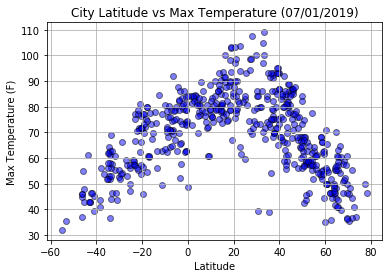

In [15]:
plt.scatter(city_pd.Lat, city_pd.Max_Temp, marker="o", label ="Urban", facecolors="blue", edgecolors="black",
             alpha=0.50)


plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature (07/01/2019)")
plt.grid(True)
plt.savefig("City Latitude vs Max Temperature.png")

plt.show

#### Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

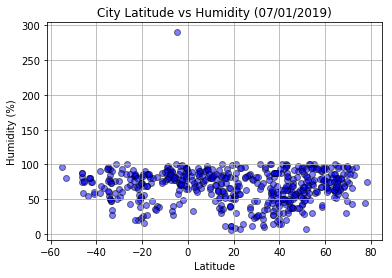

In [16]:
plt.scatter(city_pd.Lat, city_pd.Humidity, marker="o", label ="Urban", facecolors="blue", edgecolors="black",
             alpha=0.50)


plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (07/01/2019)")
plt.grid(True)
plt.savefig("City Latitude vs Humidity.png")

plt.show

#### Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

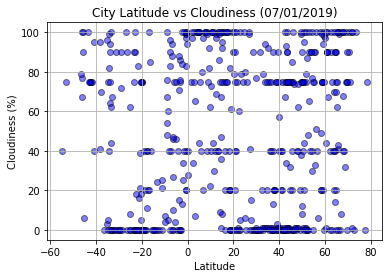

In [17]:
plt.scatter(city_pd.Lat, city_pd.Cloudiness, marker="o", label ="Urban", facecolors="blue", edgecolors="black",
             alpha=0.50)


plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (07/01/2019)")
plt.grid(True)
plt.savefig("City Latitude vs Cloudiness.png")

plt.show

#### Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

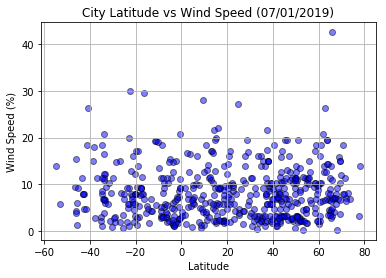

In [18]:
plt.scatter(city_pd.Lat, city_pd.Wind_Speed, marker="o", label ="Urban", facecolors="blue", edgecolors="black",
             alpha=0.50)


plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")
plt.title("City Latitude vs Wind Speed (07/01/2019)")
plt.grid(True)
plt.savefig("City Latitude vs Wind Speed.png")

plt.show

Analysis:
Latitude is the x variable as you can see it is the independent variable, so how the weather is depends on their location compared to the equator. The equatorial regions are very hot, because of their sunshine consumption, the reflection of sunrays, and atmospheric differences.
The Scatter plots show how significant the  correlation is between latitude and max-temp, the further away from the equator the colder it gets, there are some outliers that need to be explored in further details.
Looking at the wind speed you can see how the polar regions spend half the year pointed away from the sun, and seem to have higher wind speed than that of the equatorial regions.
The relationship between the two variable latitude and cloudiness, does not help with our hypothesis as it could be cloudy anywhere in the world, does not matter how far or close you are to the equator.
